<a href="https://colab.research.google.com/github/POSTI-25/CSI_task/blob/main/bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.cuda.is_available())


True


In [1]:
!pip install -U gdown torch torchvision pillow


In [3]:
import gdown

# Download original signatures
gdown.download(id='1smWwfAjMTi9gUDsahr2SqfDZM58YVk12', output='full_org.zip', quiet=False)

# Download forged signatures
gdown.download(id='14DzIvdQ6r1cKJ3Qw6Ikqk09BWBuEVgDb', output='full_forg.zip', quiet=False)

# Unzip
import zipfile

with zipfile.ZipFile('full_org.zip', 'r') as zip_ref:
    zip_ref.extractall('full_org')

with zipfile.ZipFile('full_forg.zip', 'r') as zip_ref:
    zip_ref.extractall('full_forg')


Downloading...
From (original): https://drive.google.com/uc?id=1smWwfAjMTi9gUDsahr2SqfDZM58YVk12
From (redirected): https://drive.google.com/uc?id=1smWwfAjMTi9gUDsahr2SqfDZM58YVk12&confirm=t&uuid=5f450b34-c8e3-4c21-a143-f0e674e47028
To: /content/full_org.zip
100%|██████████| 144M/144M [00:01<00:00, 140MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14DzIvdQ6r1cKJ3Qw6Ikqk09BWBuEVgDb
From (redirected): https://drive.google.com/uc?id=14DzIvdQ6r1cKJ3Qw6Ikqk09BWBuEVgDb&confirm=t&uuid=f02e9fa5-3472-4f9d-8f80-efae5b0da7b4
To: /content/full_forg.zip
100%|██████████| 111M/111M [00:00<00:00, 200MB/s]


In [4]:
import pandas as pd
import requests
from tqdm import tqdm
import os

# Load the CSV
url = "https://artbench.eecs.berkeley.edu/files/ArtBench-10.csv"
styles_csv = pd.read_csv(url)

# Selected styles
selected_styles = [
    'post_impressionism',
    'renaissance',
    'realism',
    'surrealism',
    'romanticism',
    'impressionism'
]

# Filter CSV for selected styles
filtered_styles = styles_csv[styles_csv['label'].isin(selected_styles)]

# Make folder to save styles
os.makedirs('art_styles', exist_ok=True)

# Download ~16-17 images per style
images_per_style = 17

for style in selected_styles:
    style_images = filtered_styles[filtered_styles['label'] == style].head(images_per_style)
    for i, row in style_images.iterrows():
        img_url = row['url']
        img_name = os.path.join('art_styles', f"{style}_{row['name']}.jpg")
        if not os.path.exists(img_name):  # ✅ Check if image already exists
            try:
                response = requests.get(img_url, timeout=10)
                if response.status_code == 200:
                    with open(img_name, 'wb') as f:
                        f.write(response.content)
                else:
                    print(f"❌ Failed to download {img_url}")
            except Exception as e:
                print(f"❌ Error downloading {img_url}: {e}")
        else:
            print(f"✅ Skipping {img_name}, already exists.")

print("✅ Download complete!")



✅ Download complete!


Using device: cuda
Content (Signature) Image: full_org/full_org/original_48_15.png


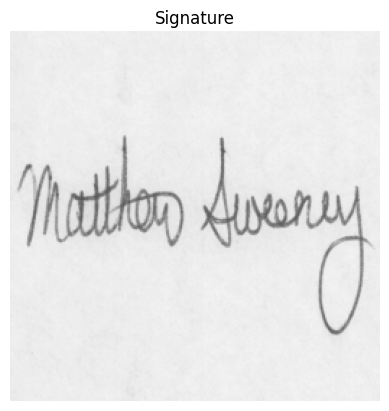

Style (Art) Image: art_styles/romanticism_john-crome_a-stream-bridge-trees-and-two-figures-in-a-landscape.jpg.jpg


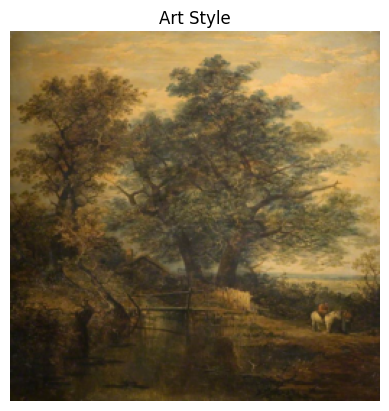

In [10]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# ✅ Define device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ✅ Preprocessing transforms (for VGG compatibility)
image_size = 256
preprocess = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# ✅ Function to load and preprocess an image
def load_image(path):
    image = Image.open(path).convert('RGB')
    image = preprocess(image).unsqueeze(0)
    return image.to(device)

# ✅ Function to display a tensor image
def imshow(tensor, title=None):
    unloader = transforms.Compose([
        transforms.Normalize(mean=[0., 0., 0.], std=[1/0.229, 1/0.224, 1/0.225]),
        transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1., 1., 1.]),
        transforms.ToPILImage()
    ])
    image = tensor.cpu().clone().squeeze(0)
    image = unloader(image)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# ✅ Use first signature image directly from 'full_org/full_org'
content_dir = 'full_org/full_org'
content_image_name = os.listdir(content_dir)[0]
content_path = os.path.join(content_dir, content_image_name)

# ✅ Sample style image from 'art_styles'
style_image_name = os.listdir('art_styles')[0]
style_path = os.path.join('art_styles', style_image_name)

# ✅ Load images
content_img = load_image(content_path)
style_img = load_image(style_path)

# ✅ Display images
print(f"Content (Signature) Image: {content_path}")
imshow(content_img, title='Signature')

print(f"Style (Art) Image: {style_path}")
imshow(style_img, title='Art Style')





In [4]:
# import os
# print(os.listdir())
# print(os.listdir('full_org'))



['.config', 'full_org', 'full_org.zip', 'full_forg.zip', 'full_forg', 'sample_data']
['full_org']


In [7]:
# print(os.listdir('full_org'))


['full_org']


In [9]:
# import os
# print(os.listdir('full_org'))
# print(os.listdir('full_org/full_org'))


['full_org']
['original_48_15.png', 'original_20_18.png', 'original_29_19.png', 'original_20_20.png', 'original_24_20.png', 'original_11_23.png', 'original_9_18.png', 'original_54_20.png', 'original_21_12.png', 'original_9_12.png', 'original_3_17.png', 'original_48_12.png', 'original_12_15.png', 'original_11_12.png', 'original_28_22.png', 'original_35_6.png', 'original_42_1.png', 'original_36_18.png', 'original_1_3.png', 'original_44_22.png', 'original_44_6.png', 'original_26_13.png', 'original_40_2.png', 'original_30_10.png', 'original_25_19.png', 'original_47_9.png', 'original_36_20.png', 'original_20_11.png', 'original_7_11.png', 'original_9_6.png', 'original_18_8.png', 'original_51_6.png', 'original_2_5.png', 'original_4_20.png', 'original_18_23.png', 'original_41_2.png', 'original_19_23.png', 'original_9_19.png', 'original_26_19.png', 'original_32_16.png', 'original_24_1.png', 'original_27_21.png', 'original_38_7.png', 'original_25_5.png', 'original_3_3.png', 'original_53_20.png',

In [12]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# ✅ Load pretrained VGG19
cnn = models.vgg19(pretrained=True).features.to(device).eval()



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 82.0MB/s]


In [20]:
# Helper to compute Gram Matrix (for style representation)
def gram_matrix(input):
    batch_size, feature_maps, h, w = input.size()
    features = input.view(feature_maps, h * w)
    G = torch.mm(features, features.t())
    return G.div(feature_maps * h * w)

# Content Loss
class ContentLoss(nn.Module):
    def __init__(self, target):
        super(ContentLoss, self).__init__()
        self.target = target.detach()

    def forward(self, x):
        self.loss = nn.functional.mse_loss(x, self.target)
        return x

# Style Loss
class StyleLoss(nn.Module):
    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, x):
        G = gram_matrix(x)
        self.loss = nn.functional.mse_loss(G, self.target)
        return x


In [31]:
import torch.nn as nn
import torchvision.models as models

# Load pre-trained VGG19
cnn = models.vgg19(pretrained=True).features.to(device).eval()

# VGG normalization parameters
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# Normalization module
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        self.mean = mean.view(-1, 1, 1)
        self.std = std.view(-1, 1, 1)

    def forward(self, img):
        return (img - self.mean) / self.std

# Layers where we'll calculate content and style losses
content_layers = ['conv_4']
style_layers = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img):
    normalization = Normalization(normalization_mean, normalization_std).to(device)
    content_losses = []
    style_losses = []

    model = nn.Sequential(normalization)

    i = 0  # increment for each conv layer
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = f'conv_{i}'
        elif isinstance(layer, nn.ReLU):
            name = f'relu_{i}'
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = f'pool_{i}'
        elif isinstance(layer, nn.BatchNorm2d):
            name = f'bn_{i}'
        else:
            raise RuntimeError(f'Unrecognized layer: {layer.__class__.__name__}')

        model.add_module(name, layer)

        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module(f"content_loss_{i}", content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module(f"style_loss_{i}", style_loss)
            style_losses.append(style_loss)

    # Trim layers after last content and style loss
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], (ContentLoss, StyleLoss)):
            break
    model = model[:i + 1]

    return model, style_losses, content_losses


In [17]:
# ✅ Optimization setup
input_img = content_img.clone().requires_grad_(True)
optimizer = optim.Adam([input_img], lr=0.01)

style_weight = 1e4  # Reduced weight
content_weight = 1
num_steps = 300

print("Starting style transfer...")

for step in range(1, num_steps + 1):
    optimizer.zero_grad()

    model(input_img)

    style_score = sum(sl.loss for sl in style_losses)
    content_score = sum(cl.loss for cl in content_losses)

    style_score *= style_weight
    content_score *= content_weight

    loss = style_score + content_score
    loss.backward()

    # Optional: gradient clipping to prevent exploding gradients
    torch.nn.utils.clip_grad_norm_([input_img], max_norm=5)

    optimizer.step()

    if step % 50 == 0 or step == 1:
        print(f"Step {step}:")
        print(f"  Style Loss : {style_score.item()}")
        print(f"  Content Loss: {content_score.item()}")

print("✅ Style transfer complete!")
## THIS ONE BAD

Starting style transfer...
Step 1:
  Style Loss : 29554.185546875
  Content Loss: 0.0
Step 50:
  Style Loss : 18692.921875
  Content Loss: 74.86383056640625
Step 100:
  Style Loss : 14786.45703125
  Content Loss: 119.38520812988281
Step 150:
  Style Loss : 12389.236328125
  Content Loss: 148.79843139648438
Step 200:
  Style Loss : 10671.396484375
  Content Loss: 172.35850524902344
Step 250:
  Style Loss : 9248.265625
  Content Loss: 191.91012573242188
Step 300:
  Style Loss : 7927.54150390625
  Content Loss: 208.80825805664062
✅ Style transfer complete!


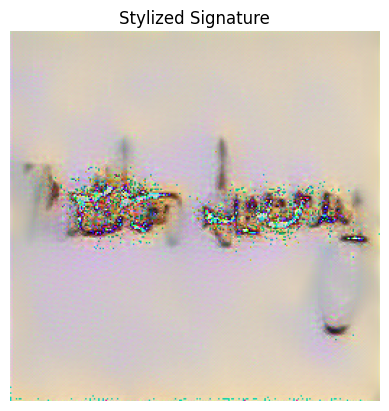

In [18]:
imshow(input_img, title='Stylized Signature')


✅ Starting improved style transfer...
Step 0:
  Style Loss : 2435.69384765625
  Content Loss: 111.99091339111328
Step 50:
  Style Loss : 2096.448974609375
  Content Loss: 220.46270751953125
Step 100:
  Style Loss : nan
  Content Loss: nan
Step 150:
  Style Loss : nan
  Content Loss: nan
Step 200:
  Style Loss : nan
  Content Loss: nan
Step 250:
  Style Loss : nan
  Content Loss: nan
Step 300:
  Style Loss : nan
  Content Loss: nan
Step 350:
  Style Loss : nan
  Content Loss: nan
Step 400:
  Style Loss : nan
  Content Loss: nan
Step 450:
  Style Loss : nan
  Content Loss: nan
Step 500:
  Style Loss : nan
  Content Loss: nan
✅ Improved style transfer complete!


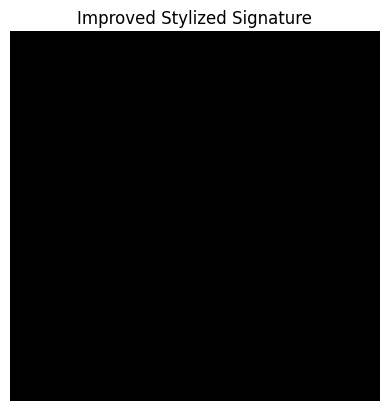

In [25]:
# Adjusted hyperparameters
style_weight = 1e3    # Reduced from 1e5
content_weight = 1e0
num_steps = 500       # Increased from 300

# Initialize the input image as a clone of the content image
input_img = content_img.clone()
input_img.requires_grad_(True)

# Optimizer
optimizer = torch.optim.LBFGS([input_img])

print("✅ Starting improved style transfer...")

run = [0]
while run[0] <= num_steps:

    def closure():
        optimizer.zero_grad()

        input_img.data.clamp_(0, 1)  # Clamp to keep pixel values valid

        model(input_img)
        style_score = 0.0
        content_score = 0.0

        for sl in style_losses:
            style_score += sl.loss
        for cl in content_losses:
            content_score += cl.loss

        style_score *= style_weight
        content_score *= content_weight

        loss = style_score + content_score
        loss.backward()

        if run[0] % 50 == 0:
            print(f"Step {run[0]}:")
            print(f"  Style Loss : {style_score.item()}")
            print(f"  Content Loss: {content_score.item()}")

        run[0] += 1
        return loss

    optimizer.step(closure)

# Final clamping
input_img.data.clamp_(0, 1)

print("✅ Improved style transfer complete!")

# Display the result
imshow(input_img, title='Improved Stylized Signature')
## THIS ONE BAD

In [47]:
import torch.optim as optim

# ✅ Clone content image as starting point
input_img = content_img.clone().requires_grad_(True)

# ✅ Use Adam optimizer with a lower learning rate
optimizer = optim.Adam([input_img], lr=5e-4)

# # ✅ Balanced weights
# style_weight = 1e3  # Adjust if too strong
# content_weight = 1
# num_steps = 300

style_weight = 1e5
content_weight = 10
num_steps = 500

model, style_losses, content_losses = get_style_model_and_losses(
    cnn, cnn_normalization_mean, cnn_normalization_std, style_img, content_img
)


print("Starting style transfer...")

for step in range(1, num_steps + 1):
    optimizer.zero_grad()

    model(input_img)

    style_score = sum(sl.loss for sl in style_losses)
    content_score = sum(cl.loss for cl in content_losses)

    loss = style_weight * style_score + content_weight * content_score
    loss.backward()

    # ✅ Clip gradients to prevent exploding gradients
    torch.nn.utils.clip_grad_norm_([input_img], max_norm=10)

    optimizer.step()

    # ✅ Clamp pixel values after each update
    with torch.no_grad():
        input_img.clamp_(0, 1)

    if step % 50 == 0 or step == 1:
        print(f"Step {step}:")
        print(f"  Style Loss : {style_score.item()}")
        print(f"  Content Loss: {content_score.item()}")

print("✅ Style transfer complete!")

## THIS GOOD

Starting style transfer...
Step 1:
  Style Loss : 2.955418586730957
  Content Loss: 0.0
Step 50:
  Style Loss : 2.392514228820801
  Content Loss: 109.15907287597656
Step 100:
  Style Loss : 2.321244955062866
  Content Loss: 109.39755249023438
Step 150:
  Style Loss : 2.2546892166137695
  Content Loss: 111.42745971679688
Step 200:
  Style Loss : 2.1955971717834473
  Content Loss: 114.15557098388672
Step 250:
  Style Loss : 2.143209934234619
  Content Loss: 117.25933074951172
Step 300:
  Style Loss : 2.0969090461730957
  Content Loss: 120.511962890625
Step 350:
  Style Loss : 2.055699586868286
  Content Loss: 123.818359375
Step 400:
  Style Loss : 2.018824815750122
  Content Loss: 127.08587646484375
Step 450:
  Style Loss : 1.9856622219085693
  Content Loss: 130.27545166015625
Step 500:
  Style Loss : 1.9555160999298096
  Content Loss: 133.34457397460938
✅ Style transfer complete!


✅ Displaying final stylized signature:


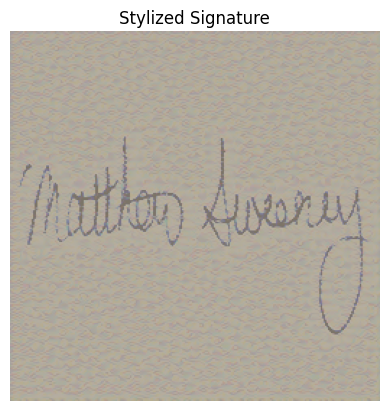

In [28]:
# ✅ Display final stylized signature
print("✅ Displaying final stylized signature:")
imshow(input_img, title='Stylized Signature')


## THIS GOOD

In [32]:
import os

os.makedirs(output_folder, exist_ok=True)

import random
from PIL import Image
import torchvision.transforms as transforms

# Make sure the paths are correct
signature_folder = "/content/full_org/"
style_folder = "/content/styles/"
output_folder = "/content/synthetic_forg/"

os.makedirs(output_folder, exist_ok=True)

# Load 10 random signatures
signature_paths = random.sample(os.listdir(signature_folder), 10)
style_paths = os.listdir(style_folder)

for idx, signature_name in enumerate(signature_paths):
    content_img_path = os.path.join(signature_folder, signature_name)
    content_img = load_image(content_img_path)  # using your load_image() function

    # Randomly pick a style image
    style_name = random.choice(style_paths)
    style_img_path = os.path.join(style_folder, style_name)
    style_img = load_image(style_img_path)

    # Clone the content image to optimize
    input_img = content_img.clone().requires_grad_(True)

    # Build the model
    model, style_losses, content_losses = get_style_model_and_losses(
        cnn, cnn_normalization_mean, cnn_normalization_std, style_img, content_img
    )

    optimizer = optim.Adam([input_img], lr=0.01)

    # Optimize
    for step in range(1, 301):
        optimizer.zero_grad()
        model(input_img)
        style_score = sum(sl.loss for sl in style_losses)
        content_score = sum(cl.loss for cl in content_losses)
        loss = style_score * 1e4 + content_score * 1
        loss.backward()
        optimizer.step()

    # Save result
    save_path = os.path.join(output_folder, f"stylized_signature_{idx+1}.png")
    unloader = transforms.ToPILImage()
    final_img = input_img.cpu().clone().detach().squeeze(0)
    image = unloader(final_img)
    image.save(save_path)

    print(f"✅ Saved stylized signature {idx+1} to {save_path}")



# import os
# import random
# import torchvision.transforms as transforms
# from PIL import Image

# # Paths to your datasets
# signature_folder = "path_to_your_original_signatures"
# style_folder = "path_to_your_style_images"
# output_folder = "synthetic_forg"

# os.makedirs(output_folder, exist_ok=True)

# # Transformations
# loader = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# ])

# def load_image(img_path):
#     image = Image.open(img_path).convert("RGB")
#     image = loader(image).unsqueeze(0).to(device)
#     return image

# # Get signature and style image paths
# signature_paths = random.sample(os.listdir(signature_folder), 10)
# style_paths = os.listdir(style_folder)

# for idx, sig_name in enumerate(signature_paths, 1):
#     # Load signature
#     sig_path = os.path.join(signature_folder, sig_name)
#     content_img = load_image(sig_path)

#     # Load random style image
#     style


ValueError: Sample larger than population or is negative

In [33]:
signature_files = os.listdir(signature_folder)
print(f"Number of signatures found: {len(signature_files)}")


Number of signatures found: 1


In [34]:
import shutil

source_folder = '/content/full_org/other_person_folder'  # Replace with actual folder
target_folder = '/content/full_org/full_org'

# Copy first 10 images from another folder
files_to_copy = os.listdir(source_folder)[:10]
for file_name in files_to_copy:
    shutil.copy(os.path.join(source_folder, file_name), target_folder)

print("✅ Added more signatures!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/full_org/other_person_folder'

In [36]:
print(os.listdir('/content/full_org/full_org'))


['original_48_15.png', 'original_20_18.png', 'original_29_19.png', 'original_20_20.png', 'original_24_20.png', 'original_11_23.png', 'original_9_18.png', 'original_54_20.png', 'original_21_12.png', 'original_9_12.png', 'original_3_17.png', 'original_48_12.png', 'original_12_15.png', 'original_11_12.png', 'original_28_22.png', 'original_35_6.png', 'original_42_1.png', 'original_36_18.png', 'original_1_3.png', 'original_44_22.png', 'original_44_6.png', 'original_26_13.png', 'original_40_2.png', 'original_30_10.png', 'original_25_19.png', 'original_47_9.png', 'original_36_20.png', 'original_20_11.png', 'original_7_11.png', 'original_9_6.png', 'original_18_8.png', 'original_51_6.png', 'original_2_5.png', 'original_4_20.png', 'original_18_23.png', 'original_41_2.png', 'original_19_23.png', 'original_9_19.png', 'original_26_19.png', 'original_32_16.png', 'original_24_1.png', 'original_27_21.png', 'original_38_7.png', 'original_25_5.png', 'original_3_3.png', 'original_53_20.png', 'original_7_

In [37]:
signature_folder = '/content/full_org/full_org'
signature_images = os.listdir(signature_folder)
print(f"Total signature images: {len(signature_images)}")


Total signature images: 1321


In [48]:
## 10 stylized signatures


# import os
# import random
import datetime
# from PIL import Image

# def tensor_to_image(tensor):
#     image = tensor.clone().detach().cpu().squeeze(0)
#     image = transforms.ToPILImage()(image)
#     return image



# # ✅ Paths
# signature_folder = '/content/full_org/full_org'
# style_folder = '/content/art_styles'
# output_folder = '/content/stylized_signatures'
# os.makedirs(output_folder, exist_ok=True)

# # ✅ Select 10 random signatures and 10 random styles
# signature_paths = random.sample(os.listdir(signature_folder), 10)
# style_paths = random.sample(os.listdir(style_folder), 10)

# for idx, (sig_path, style_path) in enumerate(zip(signature_paths, style_paths)):
#     signature = load_image(os.path.join(signature_folder, sig_path))
#     style = load_image(os.path.join(style_folder, style_path))

#     model, style_losses, content_losses = get_style_model_and_losses(
#         cnn, cnn_normalization_mean, cnn_normalization_std, style, signature
#     )

#     input_img = signature.clone().requires_grad_(True)
#     optimizer = optim.Adam([input_img], lr=0.01)

#     for step in range(1, num_steps + 1):
#         optimizer.zero_grad()
#         model(input_img)
#         style_score = sum(sl.loss for sl in style_losses) * style_weight
#         content_score = sum(cl.loss for cl in content_losses) * content_weight
#         loss = style_score + content_score
#         loss.backward()
#         optimizer.step()

#     # ✅ Timestamped filename
#     timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
#     output_filename = f'stylized_{idx+1}_{timestamp}.png'
#     output_path = os.path.join(output_folder, output_filename)

#     image = tensor_to_image(input_img)
#     image.save(output_path)

#     print(f"✅ Saved: {output_path}")





import os
import random
import time
from PIL import Image
import matplotlib.pyplot as plt

def tensor_to_image(tensor):
    image = tensor.clone().detach().cpu().squeeze(0)
    image = transforms.ToPILImage()(image)
    return image

# Hyperparameters
num_steps = 600
style_weight = 1e2  # Reduced to lessen style overpowering
content_weight = 1e1  # Increased to preserve signature clarity

# Folder paths
# signature_folder = '/content/full_org/full_org'
# style_folder = '/content/style_images'
# output_folder = '/content/stylized_signatures'

signature_folder = '/content/full_org/full_org'
style_folder = '/content/art_styles'
output_folder = '/content/stylized_signatures'


os.makedirs(output_folder, exist_ok=True)

# Load 10 random signatures and styles
signature_paths = random.sample(os.listdir(signature_folder), 10)
style_paths = random.sample(os.listdir(style_folder), 10)

stylized_images = []

for idx, (sig_path, style_path) in enumerate(zip(signature_paths, style_paths)):
    print(f"✨ Processing stylized signature {idx+1}...")

    signature = load_image(os.path.join(signature_folder, sig_path))
    style = load_image(os.path.join(style_folder, style_path))

    # Use the signature itself as initialization
    input_img = signature.clone()

    # Run style transfer with improved settings
    output, _, _ = run_style_transfer(
        cnn, cnn_normalization_mean, cnn_normalization_std,
        signature, style, input_img,
        num_steps=num_steps, style_weight=style_weight, content_weight=content_weight
    )

    # Save with timestamp to avoid overwriting
    timestamp = time.strftime("%Y%m%d%H%M%S") + str(random.randint(10000, 99999))
    output_filename = f"stylized_{idx+1}_{timestamp}.png"
    output_path = os.path.join(output_folder, output_filename)

    image = tensor_to_image(output)
    image.save(output_path)
    stylized_images.append(image)

    print(f"✅ Saved: {output_path}")

# Display the 10 stylized signatures
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, img in enumerate(stylized_images):
    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Stylized {i+1}')
plt.show()


✨ Processing stylized signature 1...


NameError: name 'run_style_transfer' is not defined

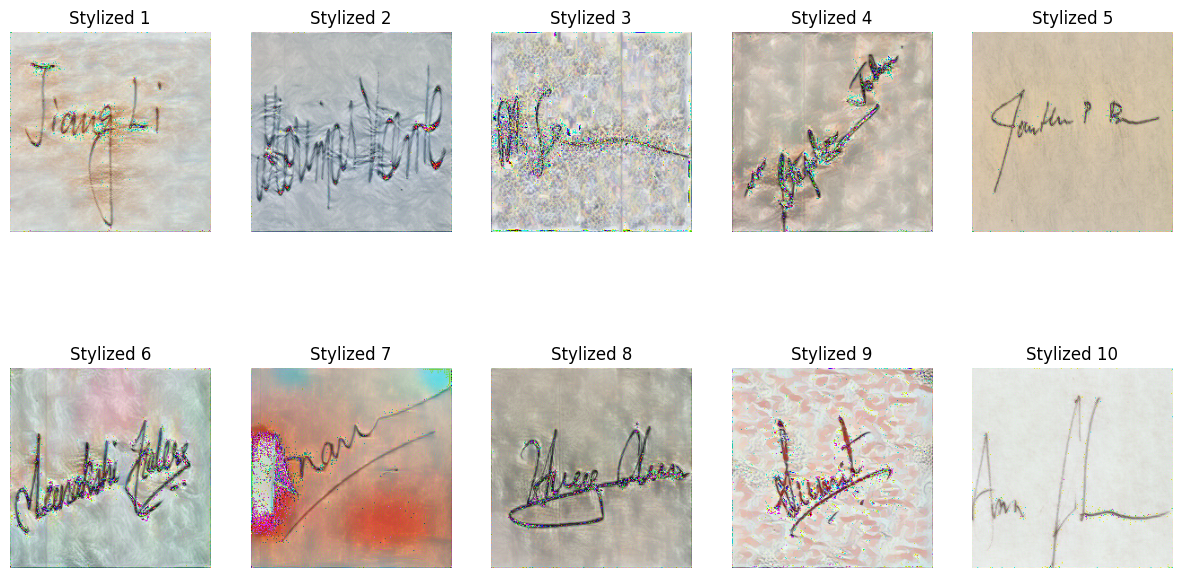

In [41]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Get the generated images
generated_images = sorted(glob.glob(output_folder + '/*.png'))

# Display the images
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(generated_images[:10]):  # Show first 10
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Stylized {i+1}")
    plt.axis('off')
plt.show()


In [45]:
import os
os.listdir('/content')


['.config',
 'art_styles',
 'synthetic_forg',
 'full_org',
 'full_org.zip',
 'full_forg.zip',
 'stylized_signatures',
 'full_forg',
 'sample_data']


🎨 Stylizing original_20_23.png with renaissance_dosso-dossi_aeneas-and-achates-on-the-libyan-coast-1520.jpg.jpg...
🌀 Starting style transfer...
Step 0:
  Style Loss : 0.007229
  Content Loss: 0.000000
Step 50:
  Style Loss : 0.006996
  Content Loss: 0.005842
Step 100:
  Style Loss : 0.006953
  Content Loss: 0.006887
Step 150:
  Style Loss : 0.006937
  Content Loss: 0.007275
Step 200:
  Style Loss : 0.006930
  Content Loss: 0.007416
✅ Style transfer complete!
✅ Saved: /content/stylized_signatures/stylized_1_20250307213456830559.png

🎨 Stylizing original_26_7.png with romanticism_john-crome_a-stream-bridge-trees-and-two-figures-in-a-landscape.jpg.jpg...
🌀 Starting style transfer...
Step 0:
  Style Loss : 0.003525
  Content Loss: 0.000000
Step 50:
  Style Loss : 0.003439
  Content Loss: 0.002047
Step 100:
  Style Loss : 0.003406
  Content Loss: 0.002825
Step 150:
  Style Loss : 0.003396
  Content Loss: 0.003071
Step 200:
  Style Loss : 0.003394
  Content Loss: 0.003123
✅ Style transfer c

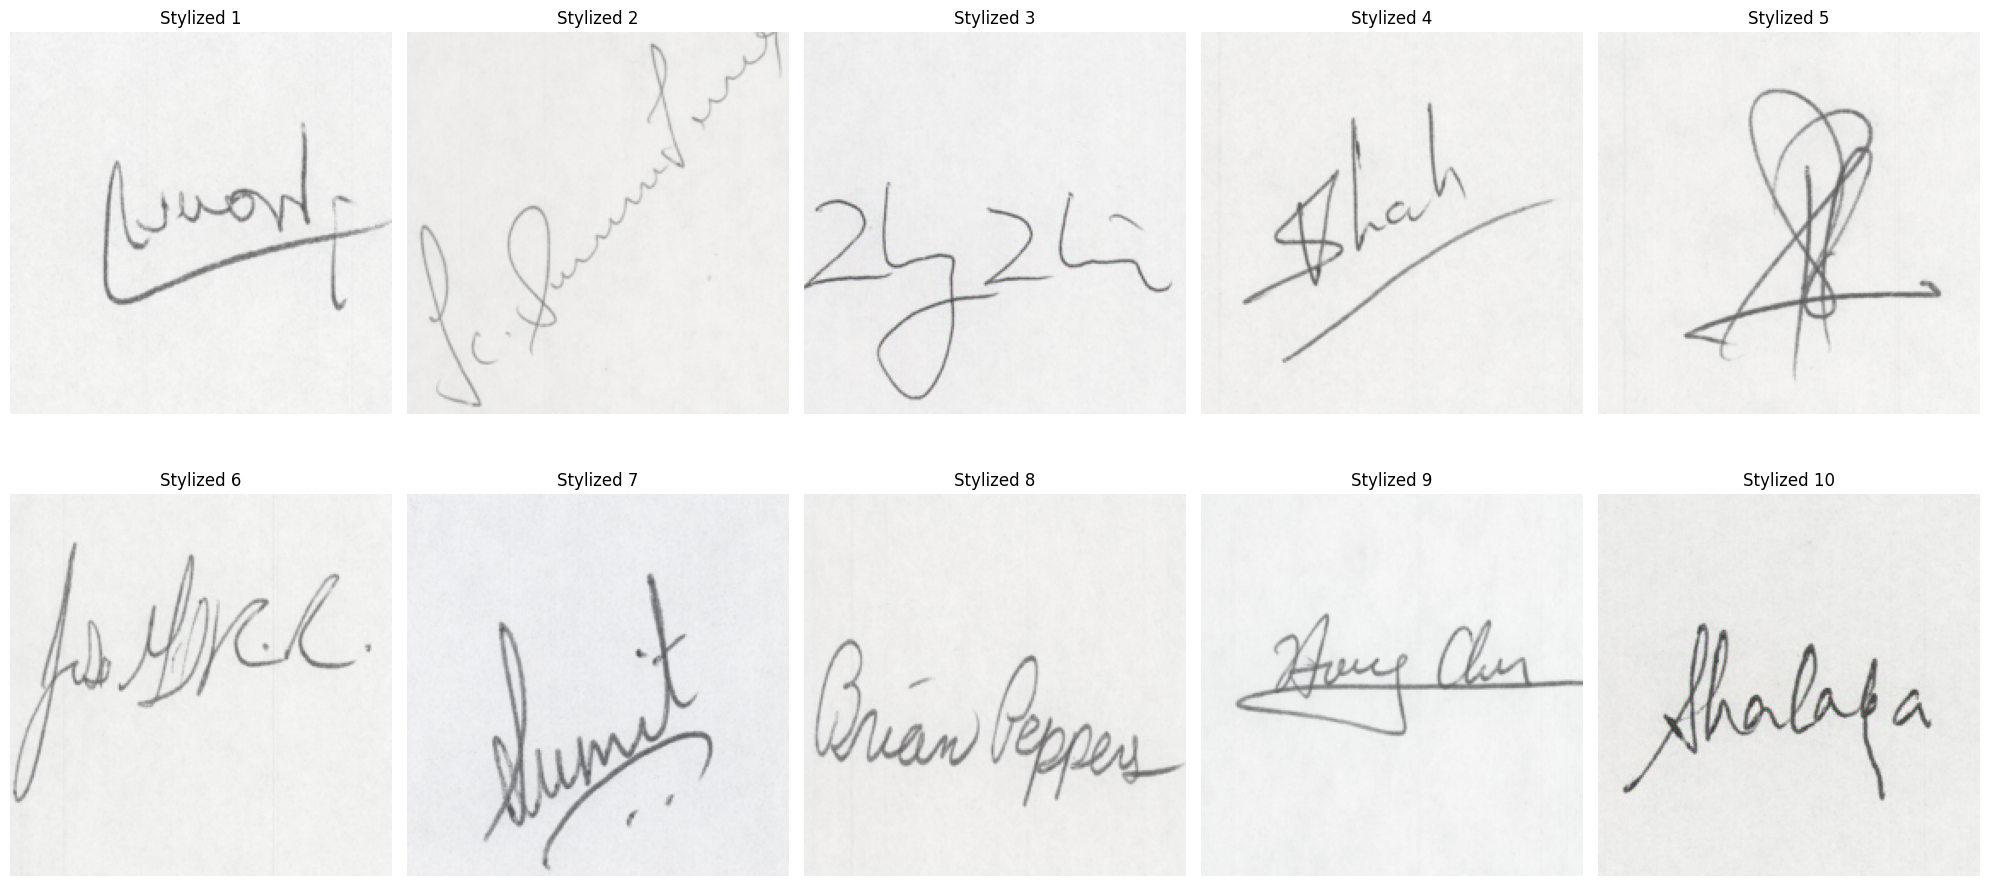

In [51]:
import os
import random
import torch
import torch.optim as optim
from datetime import datetime
import matplotlib.pyplot as plt

# Paths
signature_folder = '/content/full_org/full_org'
style_folder = '/content/art_styles'
output_folder = '/content/stylized_signatures'
os.makedirs(output_folder, exist_ok=True)

# Define run_style_transfer function
def run_style_transfer(
    cnn, normalization_mean, normalization_std,
    content_img, style_img, input_img, num_steps=300,
    style_weight=1000000, content_weight=1):

    print('🌀 Starting style transfer...')

    model, style_losses, content_losses = get_style_model_and_losses(
        cnn, normalization_mean, normalization_std, style_img, content_img
    )

    optimizer = optim.LBFGS([input_img.requires_grad_()])

    run = [0]
    while run[0] <= num_steps:

        def closure():
            input_img.data.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)

            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            loss = style_score * style_weight + content_score * content_weight
            loss.backward()

            if run[0] % 50 == 0:
                print(f"Step {run[0]}:")
                print(f"  Style Loss : {style_score.item():4f}")
                print(f"  Content Loss: {content_score.item():4f}")

            run[0] += 1
            return loss

        optimizer.step(closure)

    input_img.data.clamp_(0, 1)

    print('✅ Style transfer complete!')
    return input_img, style_losses, content_losses


# Load 10 random signatures and styles
signature_paths = random.sample(os.listdir(signature_folder), 10)
style_paths = random.sample(os.listdir(style_folder), 10)

stylized_images = []

for idx, (sig_path, style_path) in enumerate(zip(signature_paths, style_paths)):
    print(f"\n🎨 Stylizing {sig_path} with {style_path}...")

    # Load images
    signature = load_image(os.path.join(signature_folder, sig_path))
    style = load_image(os.path.join(style_folder, style_path))

    # Prepare input image
    input_img = signature.clone()

    # Run style transfer with improved settings
   # Run style transfer with improved balanced settings
    output, _, _ = run_style_transfer(
    cnn, cnn_normalization_mean, cnn_normalization_std,
    signature, style, input_img,
    num_steps=200,        # Reduce steps to avoid over-stylization
    style_weight=5000,    # 🔻 Much lower to reduce style intensity
    content_weight=100    # 🔺 Higher to preserve signature clarity
)



    # Save with unique name
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S%f")
    output_filename = f"stylized_{idx+1}_{timestamp}.png"
    output_path = os.path.join(output_folder, output_filename)

    image = tensor_to_image(output)
    image.save(output_path)
    stylized_images.append(image)

    print(f"✅ Saved: {output_path}")


# Display all stylized signatures
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, img in enumerate(stylized_images):
    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f"Stylized {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()


## THIS THE BEST

In [54]:
!zip -r /content/stylized_signatures.zip /content/stylized_signatures


  adding: content/stylized_signatures/ (stored 0%)
  adding: content/stylized_signatures/stylized_2_20250307213501266156.png (deflated 0%)
  adding: content/stylized_signatures/stylized_1_20250307212530746479.png (deflated 0%)
  adding: content/stylized_signatures/stylized_8_20250307212618385897.png (deflated 0%)
  adding: content/stylized_signatures/stylized_6_20250307211345258705.png (deflated 0%)
  adding: content/stylized_signatures/stylized_6_20250307213121988129.png (deflated 0%)
  adding: content/stylized_signatures/stylized_3_20250307211326579064.png (deflated 0%)
  adding: content/stylized_signatures/stylized_3_20250307212544339954.png (deflated 0%)
  adding: content/stylized_signatures/stylized_2_20250307211320499083.png (deflated 0%)
  adding: content/stylized_signatures/stylized_10_20250307211410462071.png (deflated 0%)
  adding: content/stylized_signatures/stylized_1_20250307213456830559.png (deflated 0%)
  adding: content/stylized_signatures/stylized_8_2025030721313090976

In [56]:
from google.colab import files
files.download('/content/stylized_signatures.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Note: This notebook generates 10 sample stylized signatures and displays them below.